# House Price Prediction Project

### Introduction

The Boston Housing Dataset (1978) is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

crim - per capita crime rate by town

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

nox - nitric oxides concentration (parts per 10 million)

rm - average number of rooms per dwelling

age - proportion of owner-occupied units built prior to 1940

dis - weighted distances to five Boston employment centres

rad - index of accessibility to radial highways

tax - full-value property-tax rate per $10,000

ptratio - pupil-teacher ratio by town

b - 1000(bk - 0.63)^2 where bk is the proportion of blacks by town

lstat (percentage lower status of the population) = 0.5 * (proportion of adults without some high school education and proportion of male workers classified as laborers)

medv - Median value of owner-occupied homes in $1000's

### Importing the Libraries

In [6]:
# data analysis libraries

import numpy as np # for linear algebra 
import pandas as pd # for creating dataframe and data processing

# Data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib inline for avoiding display issues in the jupyter notebook IDE

# Importing the Sci-kit Learn machine learning library, its modules and functions 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the dataset to a pandas data frame
house_price_dataset = pd.read_csv('BostonHousing.csv')

### Exploratory Data Analysis and Visualisation

In [4]:
# printing the first 5 rows of the data frame
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# checking the number of rows and columns in the data frame
house_price_dataset.shape

(506, 14)

In [7]:
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# statistical measures of the dataset
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
# checking for missing values in the dataframe
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

C:\Users\rudra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Houses by Median House Value')

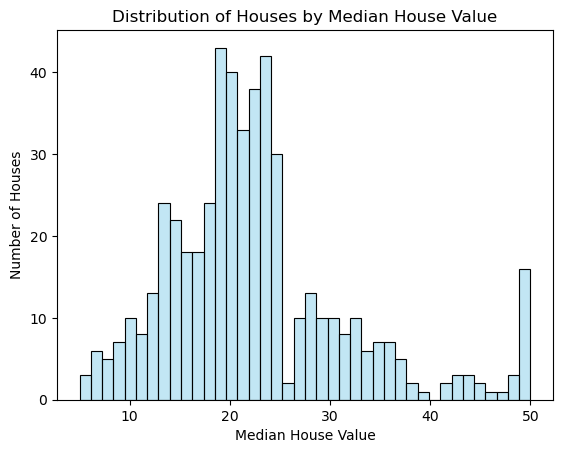

In [55]:
# Creating a Histogram for visualising the distribution of the median house values
sns.histplot(data=house_price_dataset, x='medv', color='skyblue', bins=40, alpha=0.5)
plt.xlabel('Median House Value')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Median House Value')

Its observed that a significant majority of the house prices are normalised around 15,000 usd to 25,000 usd. This makes sense as the dataset is from 1978. Moreover, we see that the house prices are cencored at 50,000 usd. Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between 40,000 usd and 50,000 usd, with prices rounded to the nearest hundred.

#### Understanding the correlations between various features in the dataset:

1. Positive correlations: If one variable increases, then the other one also increases.

2. Negative correlations: If one variable increases, then the other one decreases and vice-versa.

In [9]:
correlation = house_price_dataset.corr()

<Axes: >

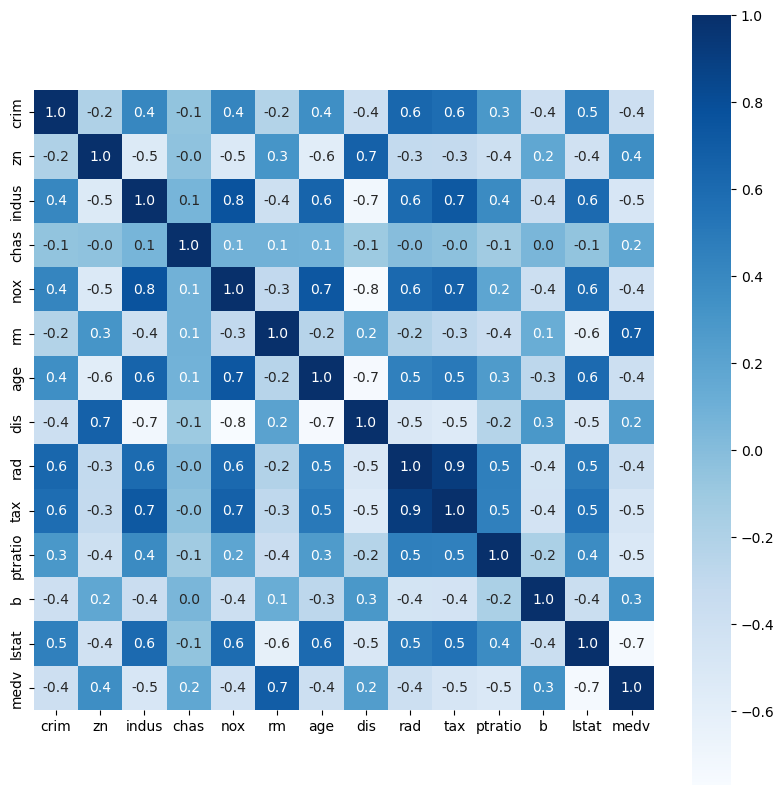

In [10]:
# constructing a heatmap to understand the correlations
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation, cbar=True, square=True, fmt='0.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

#### In the above heatmap, we see some following observations:

1.There is a high POSITIVE correlation between the average number of rooms per dwelling (rm) and the median value of the home  (medv). The reason behind this high correlation is because a house with more rooms will translate to more total square        footage for the property. This increases the total price of the property as generally, a residential property's worth is calcualted via the following formula:

Sale price of a residential property = $(price per square footage) * (total square footage)

where the price per square footage is calculated via taking the total mean of the price per square footage figures of the residential houses with similar features (like bed/bath count, built age etc), around a neighbourhood or residential area.

2.There is a high NEGATIVE correlation between the percentage of the lower status of the population (lstat) and the median value of the house medv). The reason behind the negitive correlations makes sense as the population of a lower status (defined as having lower level of education and laborers) will have lower earning potential in comparison to other economic classes in the income distribution of the general population. Therefore, as the proportion of this population demographic, having very less income potential increases, the median price of homes they want to purchase will decrease in a residential neighbourhood. This is because the housing prices are driven by the phenomenon of supply and demand. Hence, lower income potential will translate into lower home prices.

3.Another intresting correlation is the POSITIVE correlation between the crim and tax columns. As housing prices depend on the neighbourhoods they're situated in (refer point 1), and as the property taxes have a uniform rate throughout a city or county, we see that neighourhoods with high median home values pay more property taxes on average. As the property taxes are a source for funding the first responders including the police, the more net tax collection from a neighbourhood, the more the police funing and the less the crime rates are in that area.

### Splitting the Features and the Target variable

In [56]:
# X: Features, y: Target variable
X = house_price_dataset.drop(['medv'], axis=1)
y = house_price_dataset['medv']

In [16]:
print('The Features dataset:')
print('\n')
print(X)

The Features dataset:


        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [17]:
print('The Target variable (medv) dataset:')
print('\n')
print(y)

The Target variable (medv) dataset:


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


Splitting the data into the training set and test set

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


### Model Training

#### Random Forest Regressor

In [62]:
# loading the model
model = RandomForestRegressor(n_estimators=200, random_state=2)

In [63]:
# training the model with X_train
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2)

### Model Evaluation

#### Prediction on test data

In [89]:
# accuracy for the prediction on test data
prediction = model.predict(X_test)
prediction

array([21.9695, 21.063 , 32.8865, 29.486 ,  8.339 , 13.684 , 27.627 ,
       29.2365, 29.802 , 20.5755, 26.226 , 24.8035, 20.373 , 20.6005,
       11.723 , 22.365 , 18.269 , 11.392 ,  8.5335, 15.3565, 23.5235,
       20.0895, 33.813 , 19.102 , 14.1685, 19.462 , 42.295 , 33.1975,
       33.815 , 19.5165, 19.5435, 20.1935, 31.047 , 25.0955, 12.5005,
       16.4715, 10.5295, 21.1565, 21.9995, 21.446 , 25.629 , 14.3575,
       31.6115,  7.4985, 21.038 , 13.858 , 35.0445, 15.8385, 31.3415,
       14.0165, 29.767 , 25.797 ,  6.963 , 33.4215, 32.724 , 19.994 ,
       19.789 , 20.2375, 16.5275, 21.5935, 20.952 , 21.5545, 19.463 ,
       30.1705, 31.728 , 24.9115, 48.951 , 27.8235, 11.104 , 22.1245,
       16.811 ,  8.281 , 18.662 , 17.4035, 26.659 , 26.04  , 21.883 ,
       21.667 , 19.8655, 22.7585, 34.258 , 18.84  , 20.198 , 30.0375,
       46.41  , 34.8935, 19.427 , 22.747 , 30.6745, 20.804 , 20.287 ,
       20.1615, 11.1785, 34.939 , 38.041 ,  9.6305, 43.211 , 33.916 ,
       21.0415, 16.2

In [91]:
# Evaluation metrics

print('R Squared Error:', metrics.r2_score(y_test, prediction))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, prediction))
print('Root Mean Absolute Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R Squared Error: 0.885101993854333
Mean Absolute Error(MAE): 2.1745245098039203
Root Mean Absolute Error(RMSE): 3.100375886841122


As we can see, all the above three metrics have decent values which shows that the model has no problem in relation to overfitting or underfitting.

### Visualizing the Actual Price VS Predicted Price

Text(0.5, 1.0, 'Actual Price VS Predicted Price')

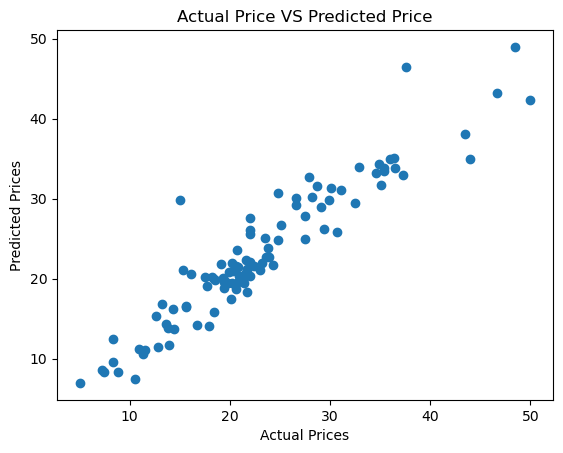

In [71]:
#Scatter plot
plt.scatter(y_test, prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price VS Predicted Price')

### Building a Prediction Model

In [92]:
#taking data from the 25th row of the raw dataset
input_data = (0.75026,0,8.14,"0",0.538,5.924,94.1,4.3996,4,307,21,394.33,16.3)
actual_home_value= (15.6)
# changing the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array
input_array_reshaped = input_data_as_numpy_array.reshape(1,-1)

model_prediction = model.predict(input_array_reshaped)
print('Predicted House value = $', model_prediction[0], 'k')
print('Actual House value = $', actual_home_value, 'k')

Predicted House value = $ 16.5275 k
Actual House value = $ 15.6 k


C:\Users\rudra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
